In [9]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import numpy as np
import itertools  
from keras import backend as K
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
train_data_path = 'rice3/train'
valid_data_path = 'rice3/valid'
img_rows = 150
img_cols = 150
epochs = 5
batch_size = 33

In [11]:
from keras import layers
from keras.models import Model

def alexnet(in_shape=(150,150,3), n_classes=3, opt='sgd'):
    in_layer = layers.Input(in_shape)
    conv1 = layers.Conv2D(64, 11, strides=4, activation='relu')(in_layer)
    pool1 = layers.MaxPool2D(3, 3)(conv1)
    conv2 = layers.Conv2D(128, 5, strides=1, padding='same', activation='relu')(pool1)
    pool2 = layers.MaxPool2D(3, 3)(conv2)
    conv3 = layers.Conv2D(256, 3, strides=1, padding='same', activation='relu')(pool2)
    conv4 = layers.Conv2D(512, 3, strides=1, padding='same', activation='relu')(conv3)
    pool3 = layers.MaxPool2D(3, 3)(conv4)
    flattened = layers.Flatten()(pool3)
    dense1 = layers.Dense(2, activation='relu')(flattened)
    drop1 = layers.Dropout(0.4)(dense1)
    dense2 = layers.Dense(2, activation='relu')(drop1)
    drop2 = layers.Dropout(0.4)(dense2)
    preds = layers.Dense(n_classes, activation='softmax')(drop2)

    model = Model(in_layer, preds)
    model.compile(loss="categorical_crossentropy", optimizer=opt,
	              metrics=["accuracy"])
    return model

if __name__ == '__main__':
    model = alexnet()
    print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 35, 35, 64)        23296     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 128)       204928    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 256)         295168    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 512)         1180160   
__________

In [12]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=45,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   shear_range=0.4,
                                   zoom_range=0.4,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(valid_data_path,
                                                        target_size=(img_rows, img_cols),
                                                        batch_size=batch_size,
                                                        shuffle=False,
                                                        class_mode='categorical')


Found 450 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [13]:
history = model.fit_generator(train_generator,
                         steps_per_epoch= 450/33,
                         validation_data=validation_generator,
                         epochs=150,
                         verbose=1,
                         validation_steps= 300/33)


Epoch 1/150
14/13 [==============================] - 19s 1s/step - loss: 1.0946 - acc: 0.3224 - val_loss: 1.0846 - val_acc: 0.6567
Epoch 2/150
14/13 [==============================] - 16s 1s/step - loss: 1.0677 - acc: 0.3661 - val_loss: 1.0736 - val_acc: 0.3333
Epoch 3/150
14/13 [==============================] - 14s 1s/step - loss: 1.0680 - acc: 0.4059 - val_loss: 1.0440 - val_acc: 0.6633
Epoch 4/150
14/13 [==============================] - 14s 1s/step - loss: 1.0527 - acc: 0.4082 - val_loss: 1.0287 - val_acc: 0.6600
Epoch 5/150
14/13 [==============================] - 13s 917ms/step - loss: 1.0472 - acc: 0.4124 - val_loss: 1.0941 - val_acc: 0.4033
Epoch 6/150
14/13 [==============================] - 13s 907ms/step - loss: 1.0661 - acc: 0.4192 - val_loss: 1.0295 - val_acc: 0.6933
Epoch 7/150
14/13 [==============================] - 16s 1s/step - loss: 1.0333 - acc: 0.4344 - val_loss: 0.9719 - val_acc: 0.5800
Epoch 8/150
14/13 [==============================] - 17s 1s/step - loss: 1.03

Epoch 63/150
14/13 [==============================] - 15s 1s/step - loss: 1.0484 - acc: 0.3997 - val_loss: 0.8796 - val_acc: 0.7167
Epoch 64/150
14/13 [==============================] - 15s 1s/step - loss: 0.9861 - acc: 0.4614 - val_loss: 0.8822 - val_acc: 0.6867
Epoch 65/150
14/13 [==============================] - 15s 1s/step - loss: 0.9961 - acc: 0.4442 - val_loss: 0.8722 - val_acc: 0.7700
Epoch 66/150
14/13 [==============================] - 14s 1s/step - loss: 0.9695 - acc: 0.4657 - val_loss: 0.8851 - val_acc: 0.6600
Epoch 67/150
14/13 [==============================] - 13s 952ms/step - loss: 0.9624 - acc: 0.4714 - val_loss: 0.8555 - val_acc: 0.7300
Epoch 68/150
14/13 [==============================] - 13s 955ms/step - loss: 0.9785 - acc: 0.4624 - val_loss: 0.8647 - val_acc: 0.6767
Epoch 69/150
14/13 [==============================] - 16s 1s/step - loss: 0.9847 - acc: 0.4669 - val_loss: 0.8772 - val_acc: 0.6500
Epoch 70/150
14/13 [==============================] - 16s 1s/step - lo

14/13 [==============================] - 15s 1s/step - loss: 1.0106 - acc: 0.4355 - val_loss: 0.7946 - val_acc: 0.6933
Epoch 125/150
14/13 [==============================] - 15s 1s/step - loss: 0.9770 - acc: 0.4517 - val_loss: 0.8082 - val_acc: 0.6667
Epoch 126/150
14/13 [==============================] - 15s 1s/step - loss: 0.9555 - acc: 0.4627 - val_loss: 0.8044 - val_acc: 0.6700
Epoch 127/150
14/13 [==============================] - 15s 1s/step - loss: 0.9233 - acc: 0.4887 - val_loss: 0.8141 - val_acc: 0.6033
Epoch 128/150
14/13 [==============================] - 15s 1s/step - loss: 0.9784 - acc: 0.4582 - val_loss: 0.8177 - val_acc: 0.6600
Epoch 129/150
14/13 [==============================] - 15s 1s/step - loss: 0.9590 - acc: 0.4627 - val_loss: 0.8056 - val_acc: 0.6600
Epoch 130/150
14/13 [==============================] - 13s 919ms/step - loss: 0.9418 - acc: 0.4737 - val_loss: 0.7814 - val_acc: 0.6933
Epoch 131/150
14/13 [==============================] - 15s 1s/step - loss: 0.947

In [14]:
Y_pred = model.predict_generator(validation_generator, 300/33)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['BrownSpot','Healthy','Leaf Blight']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[  0 100   0]
 [  0   1  99]
 [  7  87   6]]
Classification Report
              precision    recall  f1-score   support

   BrownSpot       0.00      0.00      0.00       100
     Healthy       0.01      0.01      0.01       100
 Leaf Blight       0.06      0.06      0.06       100

   micro avg       0.02      0.02      0.02       300
   macro avg       0.02      0.02      0.02       300
weighted avg       0.02      0.02      0.02       300



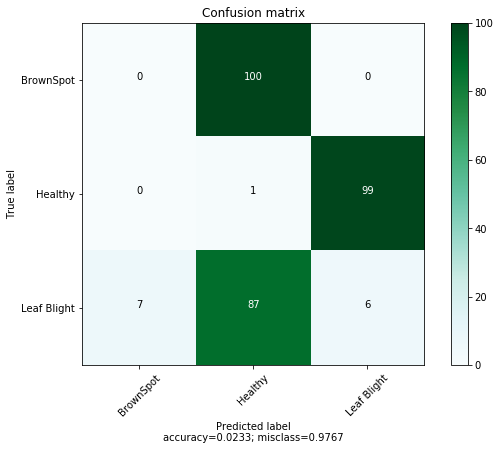

In [15]:

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
  
   

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(confusion_matrix(validation_generator.classes, y_pred), target_names = ['BrownSpot','Healthy','Leaf Blight'],cmap='BuGn') 


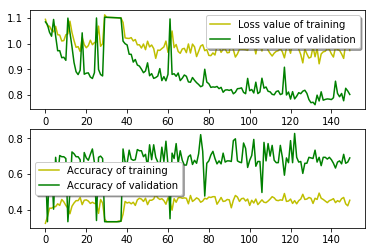

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='y', label="Loss value of training")
ax[0].plot(history.history['val_loss'], color='g', label="Loss value of validation",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='y', label="Accuracy of training")
ax[1].plot(history.history['val_acc'], color='g',label="Accuracy of validation")
legend = ax[1].legend(loc='best', shadow=True)